<a href="https://colab.research.google.com/github/Wojtek130/Neural-Networks/blob/main/nn_Assignment_5_ex5_new_architecture.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torchvision
from torchvision.transforms import ToTensor, Normalize, Compose
from torchvision.datasets import MNIST
from torch.utils.data import DataLoader
import torch.nn as nn
from IPython.display import Image
from torchvision.utils import save_image
import os
import numpy as np
import random

In [ ]:
!gdown https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/triangle.npy
!gdown https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/circle.npy
!gdown https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/t-shirt.npy
!gdown https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/shorts.npy
!gdown https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/eye.npy

Downloading...
From: https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/triangle.npy
To: /content/triangle.npy
100% 96.6M/96.6M [00:01<00:00, 69.7MB/s]
Downloading...
From: https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/circle.npy
To: /content/circle.npy
100% 96.3M/96.3M [00:01<00:00, 72.5MB/s]
Downloading...
From: https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/t-shirt.npy
To: /content/t-shirt.npy
100% 98.2M/98.2M [00:01<00:00, 52.6MB/s]
Downloading...
From: https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/shorts.npy
To: /content/shorts.npy
100% 98.0M/98.0M [00:01<00:00, 73.1MB/s]
Downloading...
From: https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/eye.npy
To: /content/eye.npy
100% 98.7M/98.7M [00:01<00:00, 73.5MB/s]


In [ ]:
classes = {
    "triangle" : 0,
    # "circle" : 1,
    # "t-shirt" : 2,
    # "shorts" : 3,
    # "eye" : 4,
}
big_dataset = []
for c_name, c_label in classes.items():
    c_imgs = np.load(f"{c_name}.npy").reshape(-1, 28, 28)
    # print(type(c_imgs))
    img_1 = c_imgs[0]
    c_imgs_with_labels = [(torch.from_numpy(img[np.newaxis, :, :]).to(torch.float32), c_label) for img in c_imgs]
    big_dataset += c_imgs_with_labels

In [ ]:
batch_size = 100
bd = random.sample(big_dataset, k=60000)
data_loader = DataLoader(bd, batch_size, shuffle=True)

In [ ]:
mnist = MNIST(root='data',
              train=True,
              download=True,
              transform=Compose([ToTensor(), Normalize(mean=(0.5,), std=(0.5,))]))

In [ ]:
len(mnist), len(big_dataset), type(random.sample(big_dataset, k=60000))

(60000, 123170, list)

In [ ]:
len(big_dataset[0])
big_dataset[0][0].shape
type(big_dataset[0][0][0][1][1].item())
len(big_dataset[:-37])

123133

In [ ]:
img, label = big_dataset[-1]
print('Label: ', label)
print(img[:,10:15,10:15])
torch.min(img), torch.max(img)

Label:  0
tensor([[[35.,  0.,  0.,  0.,  0.],
         [ 0.,  0.,  0.,  0.,  0.],
         [ 0.,  0.,  0.,  0.,  0.],
         [ 0.,  0.,  0.,  0.,  0.],
         [ 0.,  0.,  0.,  0.,  0.]]])


(tensor(0.), tensor(255.))

In [ ]:
def denorm(x):
    out = (x + 1) / 2
    return out.clamp(0, 1)

Label: 0


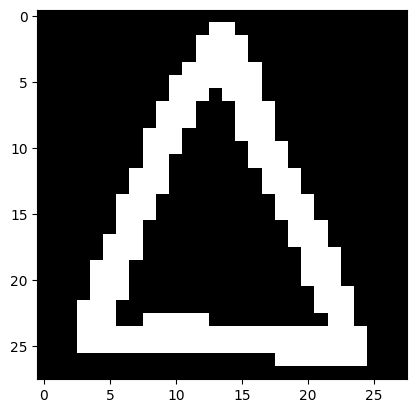

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

img_norm = denorm(img)
plt.imshow(img_norm[0], cmap='gray')
print('Label:', label)

In [ ]:
# batch_size = 100
# data_loader = DataLoader(mnist, batch_size, shuffle=True)

In [ ]:
print(type(mnist[0]), len(mnist[0]))
for x, y in data_loader:
    print(len(x), len(y), "aaa")
    break

<class 'tuple'> 2
100 100 aaa


first batch
torch.Size([100, 1, 28, 28])
tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0])


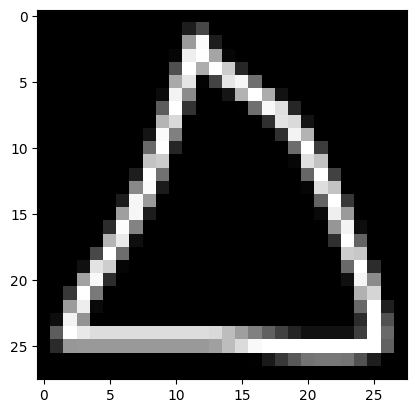

In [ ]:
for img_batch, label_batch in data_loader:
    print('first batch')
    print(img_batch.shape)
    plt.imshow(img_batch[0][0], cmap='gray')
    print(label_batch)
    break

In [ ]:
# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [ ]:
class CustomModel(nn.Module):
    def __init__(self, img_w, img_h, depth, p):
        super(CustomModel, self).__init__()

        self.conv_layers = nn.Sequential(
            nn.Conv2d(1, depth*1, kernel_size=5, stride=2, padding=2),
            nn.ReLU(),
            nn.Dropout(p),
            nn.Conv2d(depth*1, depth*2, kernel_size=5, stride=2, padding=2),
            nn.ReLU(),
            nn.Dropout(p),
            nn.Conv2d(depth*2, depth*4, kernel_size=5, stride=2, padding=2),
            nn.ReLU(),
            nn.Dropout(p),
            nn.Conv2d(depth*4, depth*8, kernel_size=5, stride=1, padding=2),
            nn.ReLU(),
            nn.Dropout(p),
            nn.Flatten()
        )

        self.output_layer = nn.Sequential(
            # nn.Linear(depth*8 * (img_w//8) * (img_h//8), 1),
            nn.Linear(8192, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        x = self.conv_layers(x)
        x = self.output_layer(x)
        return x

# Example usage:
img_w = 28
img_h = 28
depth = 64
p = 0.4

D2 = CustomModel(img_w, img_h, depth, p)
D2.to(device)

CustomModel(
  (conv_layers): Sequential(
    (0): Conv2d(1, 64, kernel_size=(5, 5), stride=(2, 2), padding=(2, 2))
    (1): ReLU()
    (2): Dropout(p=0.4, inplace=False)
    (3): Conv2d(64, 128, kernel_size=(5, 5), stride=(2, 2), padding=(2, 2))
    (4): ReLU()
    (5): Dropout(p=0.4, inplace=False)
    (6): Conv2d(128, 256, kernel_size=(5, 5), stride=(2, 2), padding=(2, 2))
    (7): ReLU()
    (8): Dropout(p=0.4, inplace=False)
    (9): Conv2d(256, 512, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (10): ReLU()
    (11): Dropout(p=0.4, inplace=False)
    (12): Flatten(start_dim=1, end_dim=-1)
  )
  (output_layer): Sequential(
    (0): Linear(in_features=8192, out_features=1, bias=True)
    (1): Sigmoid()
  )
)

In [ ]:
image_size = 784
hidden_size = 256

In [ ]:
D = nn.Sequential(
    nn.Linear(image_size, hidden_size),
    nn.LeakyReLU(0.2),
    nn.Linear(hidden_size, hidden_size),
    nn.LeakyReLU(0.2),
    nn.Linear(hidden_size, 1),
    nn.Sigmoid())

In [ ]:
D.to(device)

Sequential(
  (0): Linear(in_features=784, out_features=256, bias=True)
  (1): LeakyReLU(negative_slope=0.2)
  (2): Linear(in_features=256, out_features=256, bias=True)
  (3): LeakyReLU(negative_slope=0.2)
  (4): Linear(in_features=256, out_features=1, bias=True)
  (5): Sigmoid()
)

In [ ]:
latent_size = 64

In [ ]:
import torch
import torch.nn as nn

class Generator(nn.Module):
    def __init__(self, z_dim=100, depth=64, p=0.4):
        super(Generator, self).__init__()

        # First dense layer
        self.dense1 = nn.Sequential(
            nn.Linear(z_dim, 7*7*64),
            nn.BatchNorm1d(7*7*64),
            nn.ReLU(),
            nn.Dropout(p),
        )

        # Convolutional layers
        self.conv1 = nn.Sequential(
            nn.Upsample(scale_factor=2),
            nn.ConvTranspose2d(64, int(depth/2), kernel_size=5, padding=2),
            nn.BatchNorm2d(int(depth/2)),
            nn.ReLU(),
        )

        self.conv2 = nn.Sequential(
            nn.Upsample(scale_factor=2),
            nn.ConvTranspose2d(int(depth/2), int(depth/4), kernel_size=5, padding=2),
            nn.BatchNorm2d(int(depth/4)),
            nn.ReLU(),
        )

        self.conv3 = nn.Sequential(
            nn.ConvTranspose2d(int(depth/4), int(depth/8), kernel_size=5, padding=2),
            nn.BatchNorm2d(int(depth/8)),
            nn.ReLU(),
        )

        # Output layer
        self.output = nn.Sequential(
            nn.Conv2d(int(depth/8), 1, kernel_size=5, padding=2),
            nn.Sigmoid()
        )

    def forward(self, x):
        x = self.dense1(x)
        x = x.view(-1, 64, 7, 7)  # Reshape to (batch_size, channels, height, width)
        x = self.conv1(x)
        x = self.conv2(x)
        x = self.conv3(x)
        output = self.output(x)
        return output


In [ ]:
G2 = Generator(z_dim = latent_size)

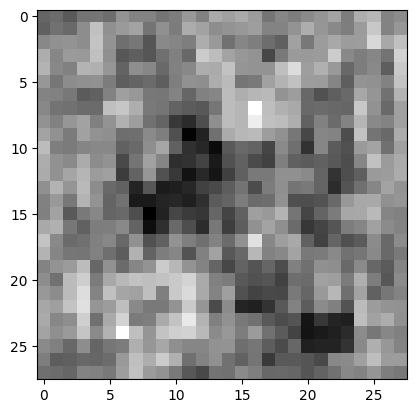

In [ ]:
y2 = G2(torch.randn(2, latent_size))
y2.shape
gen_imgs = denorm(y2.reshape((-1, 28,28)).detach())
plt.imshow(gen_imgs[0], cmap='gray')


In [ ]:
G = nn.Sequential(
    nn.Linear(latent_size, hidden_size),
    nn.ReLU(),
    nn.Linear(hidden_size, hidden_size),
    nn.ReLU(),
    nn.Linear(hidden_size, image_size),
    nn.Tanh())

In [ ]:
y = G(torch.randn(2, latent_size))
print(y.shape)
gen_imgs = denorm(y.reshape((-1, 28,28)).detach())

torch.Size([2, 784])


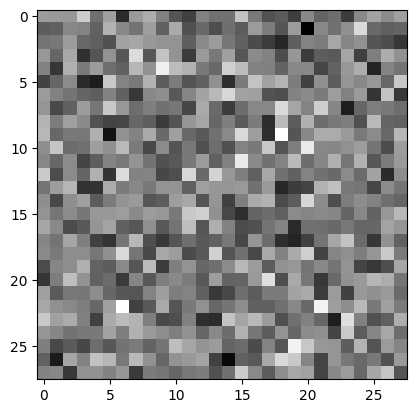

In [ ]:
plt.imshow(gen_imgs[0], cmap='gray')

In [ ]:
G.to(device)

Sequential(
  (0): Linear(in_features=64, out_features=256, bias=True)
  (1): ReLU()
  (2): Linear(in_features=256, out_features=256, bias=True)
  (3): ReLU()
  (4): Linear(in_features=256, out_features=784, bias=True)
  (5): Tanh()
)

In [ ]:
criterion = nn.BCELoss()
d_optimizer = torch.optim.Adam(D.parameters(), lr=0.0002)

In [ ]:
def reset_grad():
    d_optimizer.zero_grad()
    g_optimizer.zero_grad()

def train_discriminator(images):
    # Create the labels which are later used as input for the BCE loss
    real_labels = torch.ones(batch_size, 1).to(device)
    fake_labels = torch.zeros(batch_size, 1).to(device)

    # Loss for real images
    outputs = D2(images)
    d_loss_real = criterion(outputs, real_labels)
    real_score = outputs

    # Loss for fake images
    z = torch.randn(batch_size, latent_size).to(device)
    fake_images = G2(z)
    outputs = D2(fake_images)
    d_loss_fake = criterion(outputs, fake_labels)
    fake_score = outputs

    # Combine losses
    d_loss = d_loss_real + d_loss_fake
    # Reset gradients
    reset_grad()
    # Compute gradients
    d_loss.backward()
    # Adjust the parameters using backprop
    d_optimizer.step()

    return d_loss, real_score, fake_score

SyntaxError: invalid syntax (<ipython-input-63-e7b400e0cb28>, line 15)

In [ ]:
g_optimizer = torch.optim.Adam(G.parameters(), lr=0.0002)

In [ ]:
def train_generator():
    # Generate fake images and calculate loss
    z = torch.randn(batch_size, latent_size).to(device)
    fake_images = G2(z)
    labels = torch.ones(batch_size, 1).to(device)
    g_loss = criterion(D2(fake_images), labels)

    # Backprop and optimize
    reset_grad()
    g_loss.backward()
    g_optimizer.step()
    return g_loss, fake_images

In [ ]:
sample_dir = 'samples'
if not os.path.exists(sample_dir):
    os.makedirs(sample_dir)

In [ ]:
# Save some real images
for images, _ in data_loader:
    images = images.reshape(images.size(0), 1, 28, 28)
    save_image(denorm(images), os.path.join(sample_dir, 'real_images.png'), nrow=10)
    break

Image(os.path.join(sample_dir, 'real_images.png'))

In [ ]:
sample_vectors = torch.randn(batch_size, latent_size).to(device)

def save_fake_images(index):
    fake_images = G2(sample_vectors)
    fake_images = fake_images.reshape(fake_images.size(0), 1, 28, 28)
    fake_fname = 'fake_images-{0:0=4d}.png'.format(index)
    print('Saving', fake_fname)
    save_image(denorm(fake_images), os.path.join(sample_dir, fake_fname), nrow=10)

# Before training
save_fake_images(0)
Image(os.path.join(sample_dir, 'fake_images-0000.png'))

In [ ]:
%%time

num_epochs = 300
total_step = len(data_loader)
d_losses, g_losses, real_scores, fake_scores = [], [], [], []

for epoch in range(num_epochs):
    for i, (images, _) in enumerate(data_loader):
        # Load a batch & transform to vectors
        # images = images.reshape(batch_size, -1).to(device)
        images.to(device)

        # Train the discriminator and generator
        # print(images.shape)
        d_loss, real_score, fake_score = train_discriminator(images)
        g_loss, fake_images = train_generator()

        # Inspect the losses
        if (i+1) % 200 == 0:
            d_losses.append(d_loss.item())
            g_losses.append(g_loss.item())
            real_scores.append(real_score.mean().item())
            fake_scores.append(fake_score.mean().item())
            print('Epoch [{}/{}], Step [{}/{}], d_loss: {:.4f}, g_loss: {:.4f}, D(x): {:.2f}, D(G(z)): {:.2f}'
                  .format(epoch, num_epochs, i+1, total_step, d_loss.item(), g_loss.item(),
                          real_score.mean().item(), fake_score.mean().item()))

    # Sample and save images
    save_fake_images(epoch+1)

In [ ]:
for i, (images, _) in enumerate(data_loader):
    # Load a batch & transform to vectors
    # images = images.reshape(batch_size, -1).to(device)

    # Train the discriminator and generator
    print(images.shape)
    l1 = nn.Conv2d(1, depth*1, kernel_size=5, stride=2, padding=2)
    conv_layers = nn.Sequential(
            nn.Conv2d(1, depth*1, kernel_size=5, stride=2, padding=2),
            nn.ReLU(),
            nn.Dropout(p),
            nn.Conv2d(depth*1, depth*2, kernel_size=5, stride=2, padding=2),
            nn.ReLU(),
            nn.Dropout(p),
            nn.Conv2d(depth*2, depth*4, kernel_size=5, stride=2, padding=2),
            nn.ReLU(),
            nn.Dropout(p),
            nn.Conv2d(depth*4, depth*8, kernel_size=5, stride=1, padding=2),
            nn.ReLU(),
            nn.Dropout(p),
            nn.Flatten()
        )
    output_layer = nn.Sequential(
            nn.Linear(8192, 1),
            nn.Sigmoid()
        )
    # o = conv_layers(images)
    # o2 = output_layer(o)
    # print(o2.shape,"1!!!")
    d_loss, real_score, fake_score = train_discriminator(images)
    # print(d_loss, real_score.shape, fake_score.shape)

In [ ]:
plt.plot(d_losses, '-')
plt.plot(g_losses, '-')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['Discriminator', 'Generator'])
plt.title('Losses');

In [ ]:
Image('./samples/fake_images-0300.png')